<a href="https://colab.research.google.com/github/Han-Archives/Colab/blob/main/Chat_with_GPT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install openai

In [24]:
""" API """
import os, sys
from google.colab import drive
import pandas as pd
import openai
import requests

drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# naver_api
naver_api = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/naver_api.txt', sep=',')
naver_api = list(naver_api) # [0]:id , [1]:pw

# openai_api
openai_api = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/openai_api.txt')
openai_api = list(openai_api)
openai.api_key = openai_api[0]

In [69]:
# using papago
def translate(text,o_lang,t_lang):
  data = {'text':text, 'source':o_lang,'target':t_lang} 

  client_id = naver_api[0]
  client_secret = naver_api[1]
  url = "https://openapi.naver.com/v1/papago/n2mt"

  header = {"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}

  response = requests.post(url, headers=header, data= data)
  rescode = response.status_code

  if(rescode==200):
    t_data = response.json()
    
    return t_data['message']['result']['translatedText']
  else:
    print('Error Code: ', rescode)

# 파파고 국가별 언어

*   한국어 - ko
*   영어 - en
*   중국어간체 - zh-CN
*   중국어번체 - zh-TW
*   일본어 - ja
*   인도어 - hi
*   스페인어 - es
*   베트남어 - vi
*   프랑스어 - fr
*   독일어 - de
*   포르투칼어 - pt
*   인도네시아어 - id
*   페르시아어 - fa
*   아랍어 - ar
*   러시아어 - ru
*   미얀마어 - mm
*   태국어 - th
*   이탈리아어 - it





In [73]:
def gpt3(text):
  openai.api_key = openai_api[0]
  response = openai.Completion.create(engine="davinci", prompt=text, temperature=0.4, max_tokens=30)
  
  answer = response.choices[0].text.split('.')[0]
  answer = answer.replace('\n\n','')
  answer = answer.replace('”“', '')

  return answer

In [74]:
text = input("하고 싶은말 입력하시오. \n")
translate(text,'ko','en')
text = translate(text,'ko','en')
print('번역: ',text) # 질문을 영어로 변환
print('\n')

# GPT-3
gpt3(text)
answer = gpt3(text)
print(answer)
translate(answer,'en','ko')
answer = translate(answer,'en','ko')
print('번역: ',answer)
print('\n')

하고 싶은말 입력하시오. 
머하니?
번역:  What are you doing?


I’m going to get a drink of water
번역:  물 한 잔 마셔야겠어요.




GPT-3 의 temperatrue 값에 따라 답변이 다르게 나온다. 온도 차이의 변화에 따른 답변의 차이를 살펴보자

In [64]:
def test_gpt3(text, temp):
  openai.api_key = openai_api[0]
  response = openai.Completion.create(engine="davinci", prompt=text, temperature=temp, max_tokens=30)
  
  answer = response.choices[0].text.split('.')[0]
  answer = answer.replace('\n\n','')
  answer = answer.replace('”“', '')

  return answer

In [75]:
# Question1. 어떤 영화 좋아해?
text = input("하고 싶은말 입력하시오. \n")
translate(text,'ko','en')
text = translate(text,'ko','en')
print('번역: ',text) # 질문을 영어로 변환
print('\n')

# answer1 (temp = 0.1)
test_gpt3(text, 0.1)
answer1 = test_gpt3(text, 0.1)
print('---- temp 0.1 -------')
print(answer1)
translate(answer1,'en','ko')
answer=translate(answer1,'en','ko')
print('번역: ',answer)
print('\n')

# answer2 (temp = 0.4)
test_gpt3(text, 0.4)
answer2 = test_gpt3(text, 0.4)
print('---- temp 0.4 -------')
print(answer2)
translate(answer2,'en','ko')
answer=translate(answer2,'en','ko')
print('번역: ',answer)
print('\n')

# answer3 (temp = 0.6)
test_gpt3(text, 0.6)
answer3 = test_gpt3(text, 0.6)
print('---- temp 0.6 -------')
print(answer3)
translate(answer3,'en','ko')
answer=translate(answer3,'en','ko')
print('번역: ',answer)
print('\n')

# answer4 (temp = 0.9)
test_gpt3(text, 0.9)
answer4 = test_gpt3(text, 0.9)
print('---- temp 0.9 -------')
print(answer4)
translate(answer4,'en','ko')
answer = translate(answer4,'en','ko')
print('번역: ',answer)
print('\n')


하고 싶은말 입력하시오. 
어떤 영화 좋아하세요?
번역:  What kind of movie do you like?


---- temp 0.1 -------
I like action movies
번역:  나는 액션 영화를 좋아한다.


---- temp 0.4 -------
I like action movies, comedies, and horror movies
번역:  나는 액션 영화, 코미디, 공포 영화를 좋아한다.


---- temp 0.6 -------
I like action movies, but I also like romance movies
번역:  나는 액션 영화도 좋아하지만 로맨스 영화도 좋아한다.


---- temp 0.9 -------
The type that’s provoking enough to keep me thinking
번역:  그런 생각이 들 정도로 자극적인 타입이




In [76]:
# Question2 점심 머 먹을래?
text = input("하고 싶은말 입력하시오. \n")
translate(text,'ko','en')
text = translate(text,'ko','en')
print('번역: ',text) # 질문을 영어로 변환
print('\n')

# answer1 (temp = 0.1)
test_gpt3(text, 0.1)
answer1 = test_gpt3(text, 0.1)
print('---- temp 0.1 -------')
print(answer1)
translate(answer1,'en','ko')
answer=translate(answer1,'en','ko')
print('번역: ',answer)
print('\n')

# answer2 (temp = 0.4)
test_gpt3(text, 0.4)
answer2 = test_gpt3(text, 0.4)
print('---- temp 0.4 -------')
print(answer2)
translate(answer2,'en','ko')
answer=translate(answer2,'en','ko')
print('번역: ',answer)
print('\n')

# answer3 (temp = 0.6)
test_gpt3(text, 0.6)
answer3 = test_gpt3(text, 0.6)
print('---- temp 0.6 -------')
print(answer3)
translate(answer3,'en','ko')
answer=translate(answer3,'en','ko')
print('번역: ',answer)
print('\n')

# answer4 (temp = 0.9)
test_gpt3(text, 0.9)
answer4 = test_gpt3(text, 0.9)
print('---- temp 0.9 -------')
print(answer4)
translate(answer4,'en','ko')
answer = translate(answer4,'en','ko')
print('번역: ',answer)
print('\n')


하고 싶은말 입력하시오. 
점심 머 먹을래?
번역:  What do you want for lunch?


---- temp 0.1 -------
I don’t know
번역:  나는 모른다.


---- temp 0.4 -------
I don’t know
번역:  나는 모른다.


---- temp 0.6 -------
I’m not hungry
번역:  배고프지 않아


---- temp 0.9 -------
” my daughter asks
번역:  " 내 딸이 묻다.




In [81]:
# Question3. BTS에 어떻게 생각해?
text = input("하고 싶은말 입력하시오. \n")
translate(text,'ko','en')
text = translate(text,'ko','en')
print('번역: ',text) # 질문을 영어로 변환
print('\n')

# answer1 (temp = 0.1)
test_gpt3(text, 0.1)
answer1 = test_gpt3(text, 0.1)
print('---- temp 0.1 -------')
print(answer1)
translate(answer1,'en','ko')
answer=translate(answer1,'en','ko')
print('번역: ',answer)
print('\n')

# answer2 (temp = 0.4)
test_gpt3(text, 0.4)
answer2 = test_gpt3(text, 0.4)
print('---- temp 0.4 -------')
print(answer2)
translate(answer2,'en','ko')
answer=translate(answer2,'en','ko')
print('번역: ',answer)
print('\n')

# answer3 (temp = 0.6)
test_gpt3(text, 0.6)
answer3 = test_gpt3(text, 0.6)
print('---- temp 0.6 -------')
print(answer3)
translate(answer3,'en','ko')
answer=translate(answer3,'en','ko')
print('번역: ',answer)
print('\n')

# answer4 (temp = 0.9)
test_gpt3(text, 0.9)
answer4 = test_gpt3(text, 0.9)
print('---- temp 0.9 -------')
print(answer4)
translate(answer4,'en','ko')
answer = translate(answer4,'en','ko')
print('번역: ',answer)
print('\n')

하고 싶은말 입력하시오. 
BTS에 대해 어떻게 생각해?
번역:  What do you think about BTS?


---- temp 0.1 -------
I think they’re really cool
번역:  진짜 멋있는 것 같아요.


---- temp 0.4 -------
I think they are amazing
번역:  나는 그들이 대단하다고 생각한다.


---- temp 0.6 -------
They’re all so talented and I love that they’re all so young
번역:  그들은 모두 재능있고 너무 젊어서 좋다.


---- temp 0.9 -------
 Let us know in the comments below!
번역:  아래 댓글로 알려주세요.




In [86]:
# Question4. 김정은 어떻게 생각해?
text = input("하고 싶은말 입력하시오. \n")
translate(text,'ko','en')
text = translate(text,'ko','en')
print('번역: ',text) # 질문을 영어로 변환
print('\n')

# answer1 (temp = 0.1)
test_gpt3(text, 0.1)
answer1 = test_gpt3(text, 0.1)
print('---- temp 0.1 -------')
print(answer1)
translate(answer1,'en','ko')
answer=translate(answer1,'en','ko')
print('번역: ',answer)
print('\n')

# answer2 (temp = 0.4)
test_gpt3(text, 0.4)
answer2 = test_gpt3(text, 0.4)
print('---- temp 0.4 -------')
print(answer2)
translate(answer2,'en','ko')
answer=translate(answer2,'en','ko')
print('번역: ',answer)
print('\n')

# answer3 (temp = 0.6)
test_gpt3(text, 0.6)
answer3 = test_gpt3(text, 0.6)
print('---- temp 0.6 -------')
print(answer3)
translate(answer3,'en','ko')
answer=translate(answer3,'en','ko')
print('번역: ',answer)
print('\n')

# answer4 (temp = 0.9)
test_gpt3(text, 0.9)
answer4 = test_gpt3(text, 0.9)
print('---- temp 0.9 -------')
print(answer4)
translate(answer4,'en','ko')
answer = translate(answer4,'en','ko')
print('번역: ',answer)
print('\n')

하고 싶은말 입력하시오. 
김정은에 대해 어떻게 생각해?
번역:  What do you think about Kim Jong Un?


---- temp 0.1 -------
I think he’s a great guy
번역:  나는 그가 좋은 사람이라고 생각한다.


---- temp 0.4 -------
I think he’s a great guy
번역:  나는 그가 좋은 사람이라고 생각한다.


---- temp 0.6 -------
I think he's very good
번역:  아주 잘하는 것 같아요.


---- temp 0.9 -------
” I asked her
번역:  " 그녀에게 물었다.




## 챗봇 만들기

GPT3의 응답기능을 활용하여 특정한 상황에서 사용할 수 있는 챗봇을 만들어보자.


In [9]:
!git clone https://github.com/shreyashankar/gpt3-sandbox.git

Cloning into 'gpt3-sandbox'...
remote: Enumerating objects: 2482, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 2482 (delta 37), reused 11 (delta 5), pack-reused 2404
Receiving objects: 100% (2482/2482), 5.48 MiB | 13.23 MiB/s, done.
Resolving deltas: 100% (704/704), done.


In [10]:
cd gpt3-sandbox

/content/gpt3-sandbox/gpt3-sandbox


In [11]:
!pip install -r api/requirements.txt

In [14]:
from api import GPT,Example
gpt = GPT(temperature=0.6, max_tokens=100)

## 시나리오 설정 - 백화점

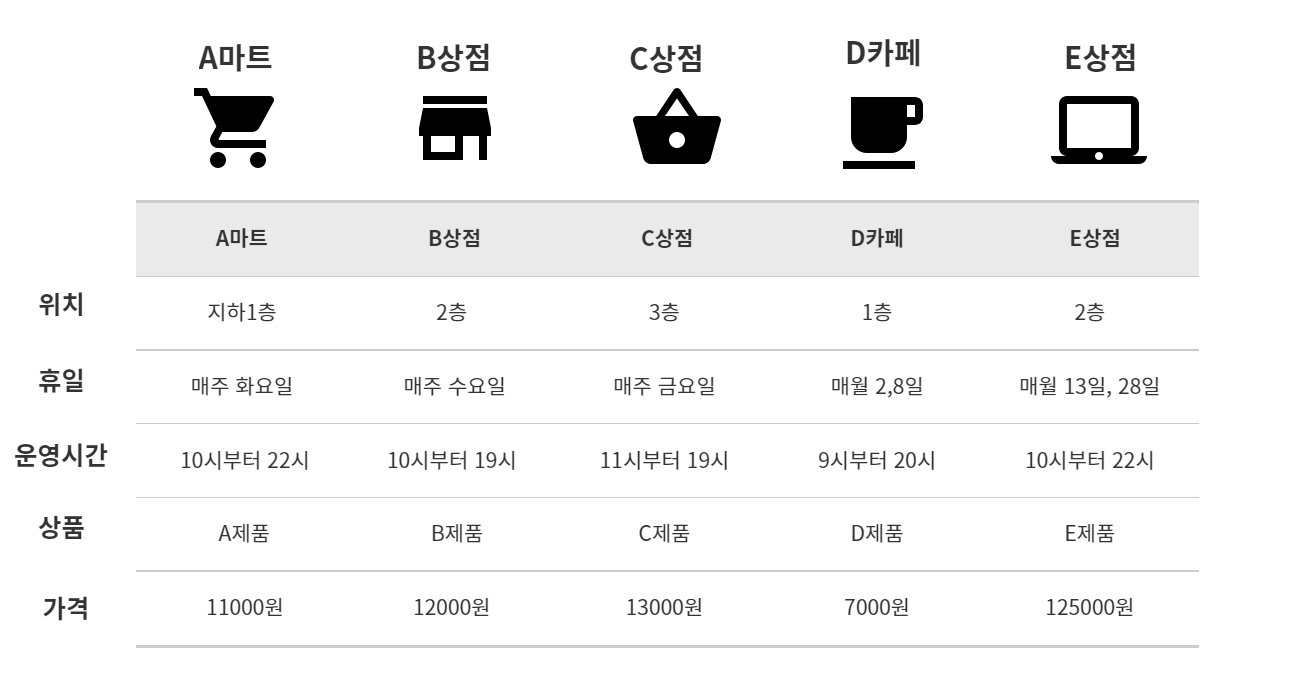

In [15]:
# 예제 추가하기
# A마트
gpt.add_example(Example(
    "A마트 어디에 있어? ",
    "지하 1층에 위치합니다."
))

gpt.add_example(Example(
    "A마트 언제 쉬어? ",
    "매주 화요일에 쉽니다."
))

gpt.add_example(Example(
    "A마트 언제까지 해? ",
    "10시부터 22시까지 운영합니다."
))

gpt.add_example(Example(
    "A마트에 머 팔어? ",
    "A제품이 가장 잘 팔립니다."
))

gpt.add_example(Example(
    "A제품 얼마야? ",
    "11000원에 판매중입니다."
))

In [32]:
# B상점
gpt.add_example(Example(
    "B상점 어디에 있어? ",
    "2층에 위치합니다."
))

gpt.add_example(Example(
    "B상점 언제 쉬어? ",
    "매주 수요일에 쉽니다."
))

gpt.add_example(Example(
    "B상점 운영시간 알려줘 ",
    "10시부터 19시까지 운영합니다."
))

gpt.add_example(Example(
    "B상점에 머 팔어? ",
    "B제품이 가장 잘 팔립니다."
))

gpt.add_example(Example(
    "B제품 얼마야? ",
    "12000원에 판매중입니다."
))

In [16]:
# C상점
gpt.add_example(Example(
    "C상점 어디에 있어? ",
    "3층에 위치합니다."
))

gpt.add_example(Example(
    "C상점 언제 쉬어? ",
    "매주 금요일에 쉽니다."
))

gpt.add_example(Example(
    "C상점 언제까지 해? ",
    "11시부터 19시까지 운영합니다."
))

gpt.add_example(Example(
    "C상점에 머 팔어? ",
    "C제품이 가장 잘 팔립니다."
))

gpt.add_example(Example(
    "C제품 얼마야? ",
    "13000원에 판매중입니다."
))

In [18]:
# D카페
gpt.add_example(Example(
    "D카페 어디에 있어? ",
    "1층에 위치합니다."
))

gpt.add_example(Example(
    "D카페 언제 쉬어? ",
    "매월 2일, 8일에 쉽니다."
))

gpt.add_example(Example(
    "D카페 언제까지 해? ",
    "9시부터 20시까지 운영합니다."
))

gpt.add_example(Example(
    "D카페에 머 팔어? ",
    "D음료가 가장 잘 팔립니다."
))

gpt.add_example(Example(
    "D음료 얼마야? ",
    "7000원에 판매중입니다."
))

In [20]:
# E상점
gpt.add_example(Example(
    "E상점 어디에 있어? ",
    "2층에 위치합니다."
))

gpt.add_example(Example(
    "E상점 언제 쉬어? ",
    "매월 13일, 28일에 쉽니다."
))

gpt.add_example(Example(
    "E상점 언제까지 해? ",
    "10시부터 22시까지 운영합니다."
))

gpt.add_example(Example(
    "E상점에 머 팔어? ",
    "E제품이 가장 잘 팔립니다."
))

gpt.add_example(Example(
    "E제품 얼마야? ",
    "125000원에 판매중입니다."
))

In [37]:
prompt = "A마트에 머 팔어?"
output = gpt.submit_request(prompt)
output.choices[0]['text']

InvalidRequestError: ignored

In [35]:
prompt = "B상점 운영시간 알려줘"
output = gpt.submit_request(prompt)
output.choices[0]['text']

InvalidRequestError: ignored